In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#Load Data
dataset = datasets.load_boston()
x = dataset.data
y = dataset.target

In [12]:
print(x.shape)
print(y.shape)

(506, 13)
(506,)


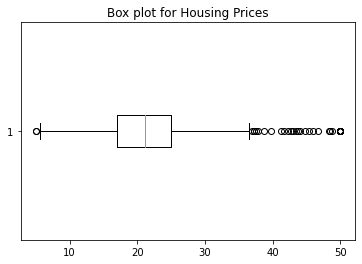

In [15]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box plot for Housing Prices')
_ = ax1.boxplot(y, vert=False)


In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
#
# Load the Boston Housing dataset for training
#
bhd = datasets.load_boston()
df = pd.DataFrame(bhd.data)

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
               'TAX', 'PTRATIO', 'B', 'LSTAT']
df['MEDV'] = bhd.target

In [24]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
#
# Select Avg. No of rooms per dwelling as feature
# and fit the model
#
X = df['RM'].to_numpy().reshape(-1, 1)
y = df['MEDV'].to_numpy().reshape(-1, 1)

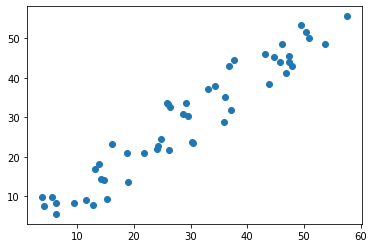

In [26]:
np.random.seed(100)
N = 50
noise = 10.
X = np.arange(N) + noise*np.random.rand(N)
y = np.arange(N) + noise*np.random.rand(N)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
_ = plt.scatter(X, y)

In [2]:
import math
import json

In [3]:
FILE = "scan_data.json"
#with open(FILE, 'r') as f:
f = open(FILE, 'r')
laser_data = json.load(f)
f.close()


In [4]:
def convert_scan(scan):
    angle_min = scan['angle_min']
    angle_max = scan['angle_max']
    angle_inc = scan['angle_increment']
    range_min = scan['range_min']
    #range_max = scan['range_max']
    range_max = 20.
    rho = scan['ranges']
    

    
    angle_inc = (angle_max - angle_min)/len(rho)
    theta = [angle_min + i*angle_inc for i in range(len(rho))]

    
    mask = np.asarray(rho) > range_max
    rho = np.delete(rho, mask)
    theta = np.delete(theta, mask)
   
   
    X = np.multiply(rho, np.cos(theta)).reshape(-1,1)
    y = np.multiply(rho, np.sin(theta)).reshape(-1,1)
    
    return X, y

In [5]:
X, y = convert_scan(laser_data)

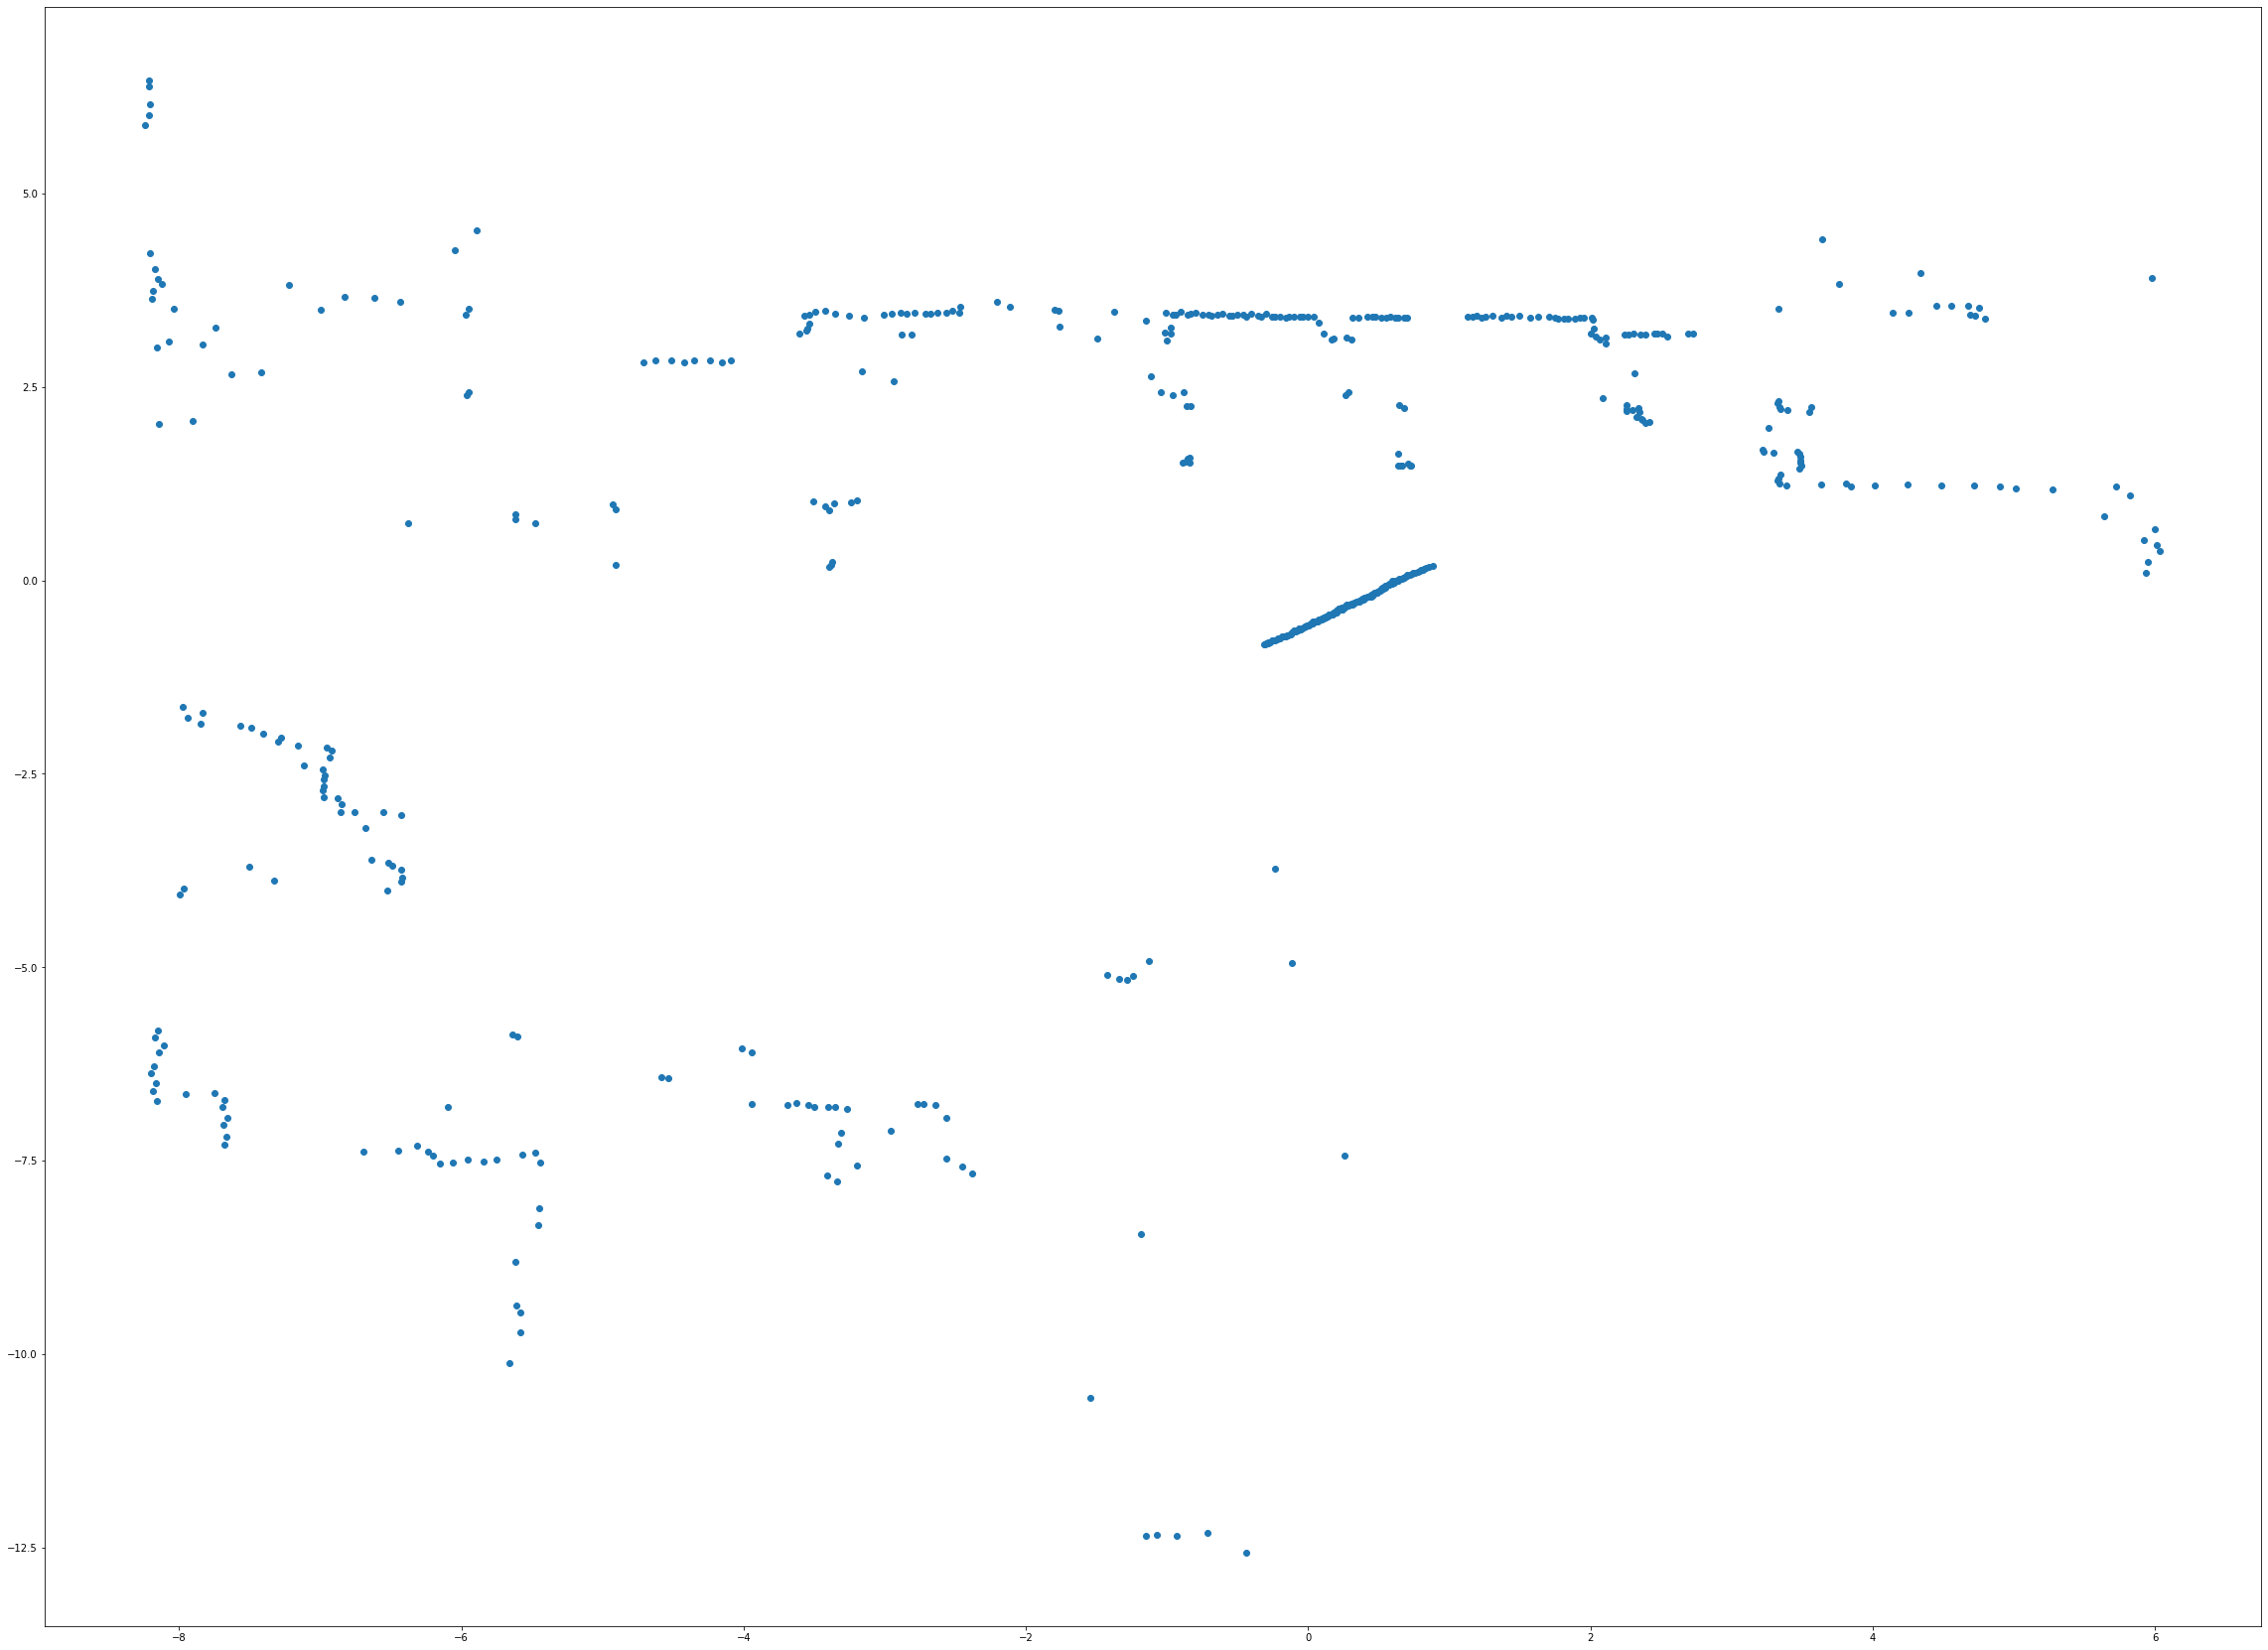

In [6]:
plt.figure(figsize=(40, 30))
_ = plt.scatter(X, y)

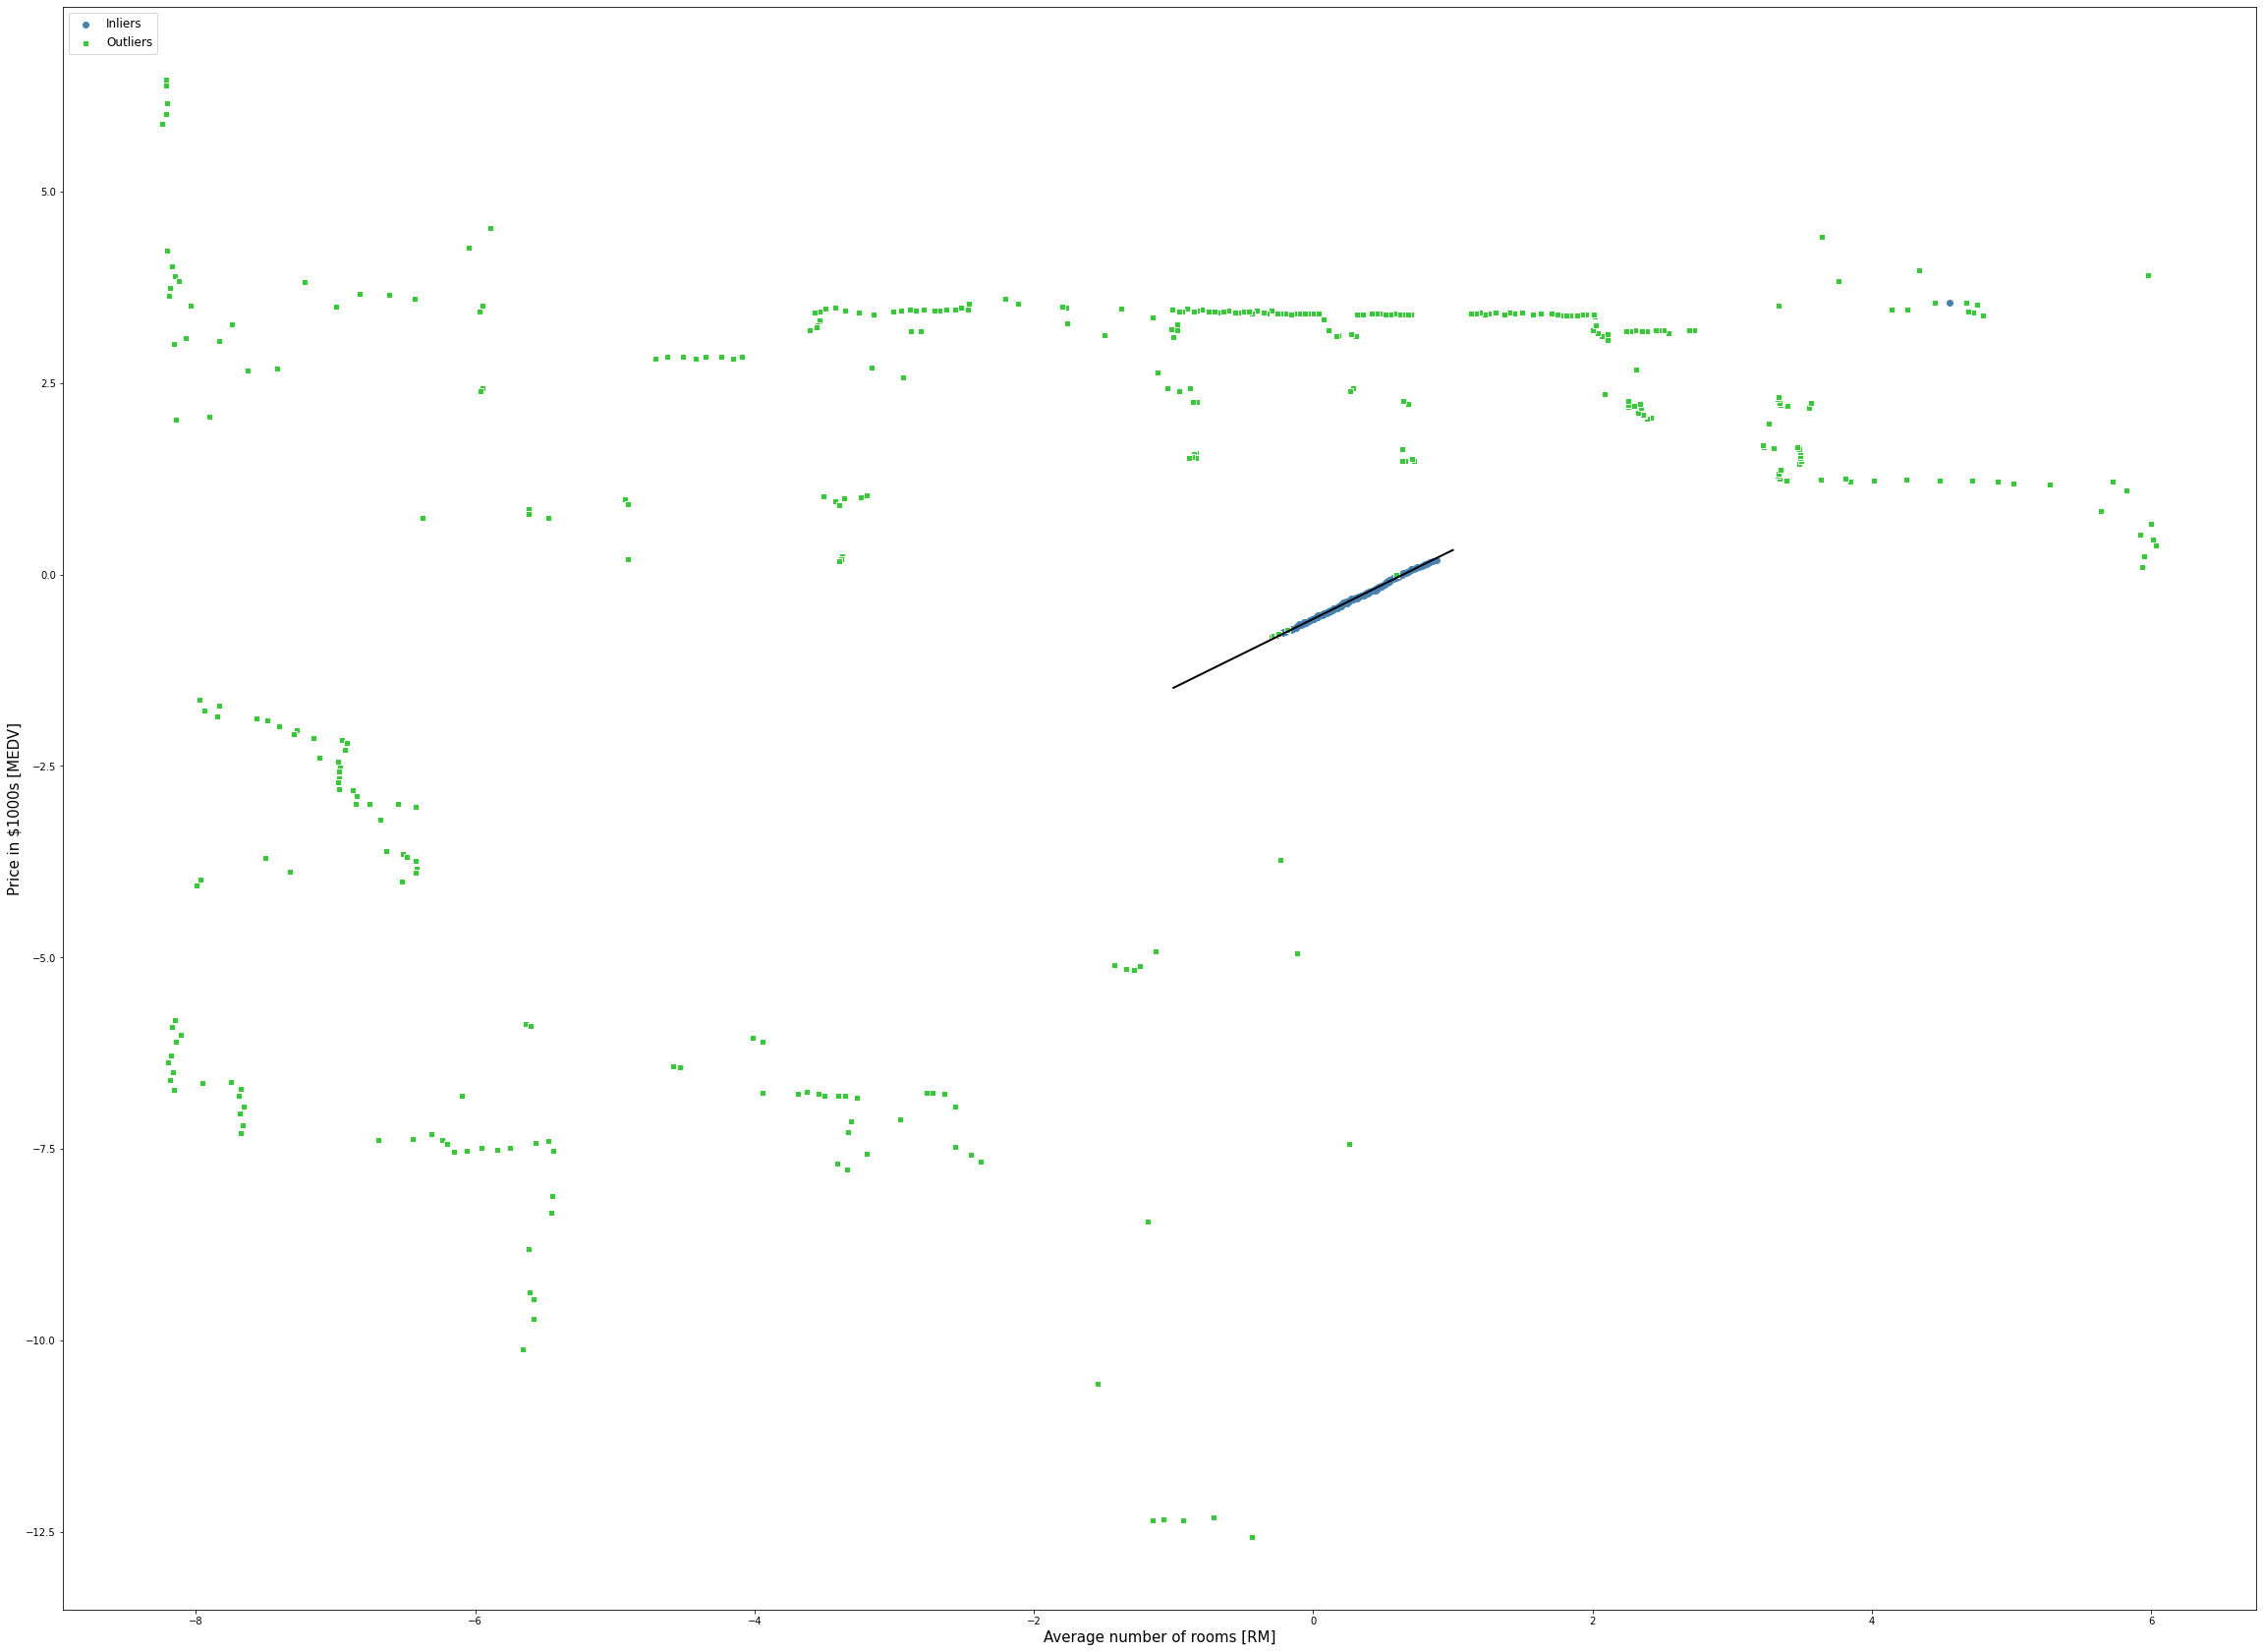

In [48]:
#
# Create an instance of RANSACRegressor
#
#ransac = RANSACRegressor(base_estimator=LinearRegression(),
#                         min_samples=10, max_trials=2000,
#                         loss='absolute_loss', random_state=42,
#                         residual_threshold=0.05)
ransac = RANSACRegressor(base_estimator=LinearRegression(),
                         min_samples=10, max_trials=2000,
                         loss='absolute_loss', random_state=42,
                         residual_threshold=0.05)
#
# Fit the model
#
ransac.fit(X, y)

#
# Get the Inlier mask; Create outlier mask
#
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

#
# Create scatter plot for inlier datset
#
plt.figure(figsize=(40, 30))
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', marker='o', label='Inliers')
#
# Create scatter plot for outlier datset
#
plt.scatter(X[outlier_mask], y[outlier_mask],
             c='limegreen', edgecolor='white',
             marker='s', label='Outliers')
#
# Draw the best fit line
#
#line_X = np.arange(-1, 2, 1)
line_X = np.array([-1, 1])
#line_X = np.arange(np.min(X), np.max(X),1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

point1 = np.array([line_X[0], line_y_ransac[0][0]])
point2 = np.array([line_X[1], line_y_ransac[1][0]])
dir_vec = compute_perp(np.array([np.diff(line_X, axis=0)[0], np.diff(line_y_ransac, axis=0)[0][0]])) 
dir_vec += point1



plt.plot(line_X, line_y_ransac, color='black', lw=2)
#plt.plot([point1[0], dir_vec[0]], [point1[1], dir_vec[1]], color='blue', lw=2)
plt.xlabel('Average number of rooms [RM]', fontsize=15)
plt.ylabel('Price in $1000s [MEDV]', fontsize=15)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [124]:
line_y_ransac

array([[-1.47941677],
       [-0.57992245],
       [ 0.31957187]])

In [137]:
from sympy import Line

In [190]:
#l1 = Line((line_X[0],line_y_ransac[0][0]), (line_X[1],line_y_ransac[1][0]))
#l2 = Line((line_X[0],line_y_ransac[0][0]), (line_X[1],line_y_ransac[1][0]))
l1 = Line((0,0),(1,0))
l2 = Line((0,0),(-1,0))

angle = float(l1.angle_between(l2)) 

print(angle)

3.141592653589793


In [42]:
""" Calculate the angle between two lines that join at (x1, y1) """

from math import atan2, pi

def calculate_angle(x1,y1,x2,y2,x3,y3,x4,y4):
    # Calculate the angles created.
    delta_x = float(x2 - x1)
    delta_y = float(y2 - y1)
    answer = atan2(delta_y, delta_x)*180.0/pi

    delta_x = float(x4 - x3)
    delta_y = float(y4 - y3)
    answer1 = atan2(delta_y, delta_x)*180.0/pi

    # Get the answer
    if answer > answer1:
        return answer-answer1
    else:
        return answer1-answer


x1, y1, x2, y2 = 1.0, 1.0, 1.0, 3.0
print("")
x3, y3 = x1 ,y1
x4, y4 = 1.0, 1.0
#result = calculate_angle(x1,y1,x2,y2,x3,y3,x4,y4)
result = calculate_angle(point1[0], point1[1], point2[0], point2[1], point1[0], point1[1], dir_vec[0], dir_vec[1])
print("The angle between the two joined lines is",result)


The angle between the two joined lines is 90.0


In [99]:
def hough_line(img):
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0))
    width, height = img.shape
    diag_len = np.ceil(np.sqrt(width * width + height * height))   # max_dist
    rhos = np.linspace(int(-diag_len), int(diag_len), int(diag_len * 2.0))

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * int(diag_len), num_thetas), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(img)  # (row, col) indexes to edges

    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

    for t_idx in range(num_thetas):
      # Calculate rho. diag_len is added for a positive index
        rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
        accumulator[int(rho), t_idx] += 1

    return accumulator, thetas, rhos


rho=-38.77, theta=-90


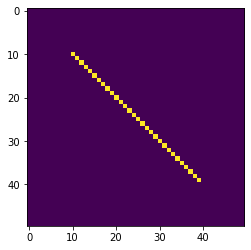

In [135]:

# Create binary image and call hough_line
image = np.zeros((50,50))
image[10:40, 10:40] = np.eye(30)
accumulator, thetas, rhos = hough_line(image)

# Easiest peak finding based on max votes
idx = int(np.argmax(accumulator))
rho = rhos[int(idx / accumulator.shape[1])]
theta = thetas[idx % accumulator.shape[1]]
print("rho={0:.2f}, theta={1:.0f}".format(rho, np.rad2deg(theta)))
plt.imshow(image)

In [8]:
def py_ang(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'    """
    cos_theta = np.dot(v1, v2)
    sin_theta = np.linalg.norm(np.cross(v1, v2))
    print(sin_theta)
    print(cos_theta)
    print(sin_theta/cos_theta)
    return np.arctan2(sin_theta, cos_theta) 
    #return np.arctan2(v1, v2)

In [9]:
#v1 = np.array([[0.0, 0.0], [1.0, 0.0]])
#v2 = np.array([[0.0, 0.0], [0.0, 1.0]])
v1 = np.array([1.0, 0.0])
v2 = np.array([-5.0, -5.0])

py_ang(v2, v1)

5.0
-5.0
-1.0


2.356194490192345

In [206]:
line_X

array([-1,  1])

In [207]:
line_y_ransac

array([[-1.47941677],
       [ 0.31957187]])

In [226]:
print(np.diff(line_X, axis=0)[0])

2


In [224]:
np.diff(line_y_ransac, axis=0)[0][0]

1.7989886352140343

In [36]:

#v1 = np.array([line_X[0], line_y_ransac[0][0]])
#v2 = np.array([line_X[1], line_y_ransac[1][0]])

v1 = np.array([np.diff(line_X, axis=0)[0], np.diff(line_y_ransac, axis=0)[0][0]])
v2 = np.array([line_X[0], line_y_ransac[0][0]])
v3 = np.array([line_X[1], line_y_ransac[1][0]])

print(v1)
print(v2)
print(v1 + v2)
print(v3)

#py_ang(v2,v1)

[2.         1.79898864]
[-1.         -1.47941677]
[1.         0.31957187]
[1.         0.31957187]


In [40]:
def compute_perp( a ) :
    b = np.empty_like(a)
    b[0] = a[1]
    b[1] = -1*a[0]
    return b

In [38]:
print(v1)
v1_perp = perp_vec(v1)
print(v1_perp)

[2.         1.79898864]
[ 1.79898864 -2.        ]


In [27]:
print(v2)
v2_perp = perp_vec(v2)
print(v2_perp)

[1.         0.31957187]


In [46]:
line_y_ransac.flatten()

array([-1.47941677,  0.31957187])